In [43]:
import numpy as np
import pandas as pd
import warnings

In [44]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [45]:
df = pd.read_csv('C:\\Users\\asada\\Desktop\\Projects\\email_spam_detector\\emails.csv')

In [46]:
df.head()

,text,spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88
0,Subject: naturally irresistible your corporate...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: the stock trading gunslinger fanny i...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Subject: unbelievable new homes made easy im ...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Subject: 4 color printing special request add...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Subject: do not have money , get software cds ...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_1 = df[['text', 'spam']]

In [48]:
df_1.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


In [49]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    5726 non-null   object 
 1   spam    5726 non-null   float64
dtypes: float64(1), object(1)
memory usage: 89.7+ KB


In [50]:
df_1['text'].shape

(5732,)

In [51]:
df_1['spam'].shape

(5732,)

In [52]:
df_1.isna().sum()

text    6
spam    6
dtype: int64

In [53]:
df_2 = df_1.dropna()

In [54]:
df_2

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0
...,...,...
5727,Subject: re : research and development charges...,0.0
5728,"Subject: re : receipts from visit jim , than...",0.0
5729,Subject: re : enron case study update wow ! a...,0.0
5730,"Subject: re : interest david , please , call...",0.0


In [55]:
df_2.shape

(5726, 2)

In [56]:
df_2.isna().sum()

text    0
spam    0
dtype: int64

In [57]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5726 entries, 0 to 5731
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    5726 non-null   object 
 1   spam    5726 non-null   float64
dtypes: float64(1), object(1)
memory usage: 134.2+ KB


In [58]:
df_2.describe()

,spam
count,5726.000000
mean,0.238910
std,0.426455
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [59]:
df_2.dtypes

text     object
spam    float64
dtype: object

In [60]:
df_2['spam'].unique()

array([1., 0.])

In [61]:
df_2.duplicated().any()

True

In [62]:
df_2.duplicated().sum()

33

In [63]:
df_2.drop_duplicates(inplace = True)

C:\Users\asada\AppData\Local\Temp\ipykernel_13092\3361838139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop_duplicates(inplace = True)


In [64]:
df_2.shape

(5693, 2)

In [65]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5693 entries, 0 to 5731
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    5693 non-null   object 
 1   spam    5693 non-null   float64
dtypes: float64(1), object(1)
memory usage: 133.4+ KB


In [66]:
df_3 = df_2.dropna(subset=['spam'], inplace=False)
df_3['spam'].info()

<class 'pandas.core.series.Series'>
Index: 5693 entries, 0 to 5731
Series name: spam
Non-Null Count  Dtype  
--------------  -----  
5693 non-null   float64
dtypes: float64(1)
memory usage: 89.0 KB


In [67]:
counts = df_3['spam'].value_counts()
counts

spam
0.0    4325
1.0    1368
Name: count, dtype: int64

In [68]:
import matplotlib.pyplot as plt

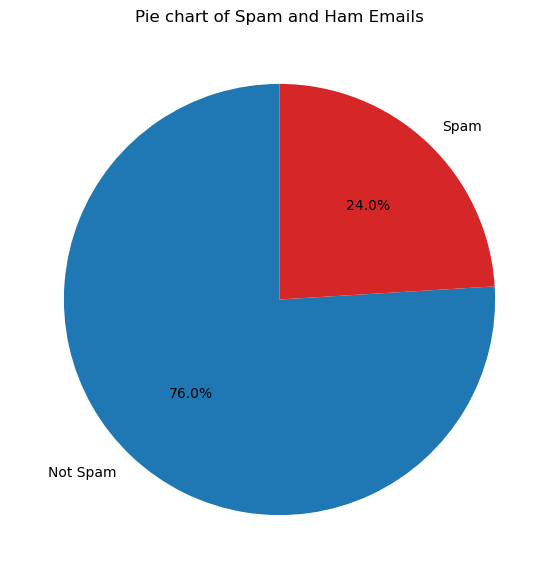

In [69]:

plt.figure(figsize = (10,7))
plt.pie(counts, labels=['Not Spam', 'Spam'], autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#d62728'])
plt.title('Pie chart of Spam and Ham Emails')
plt.show()

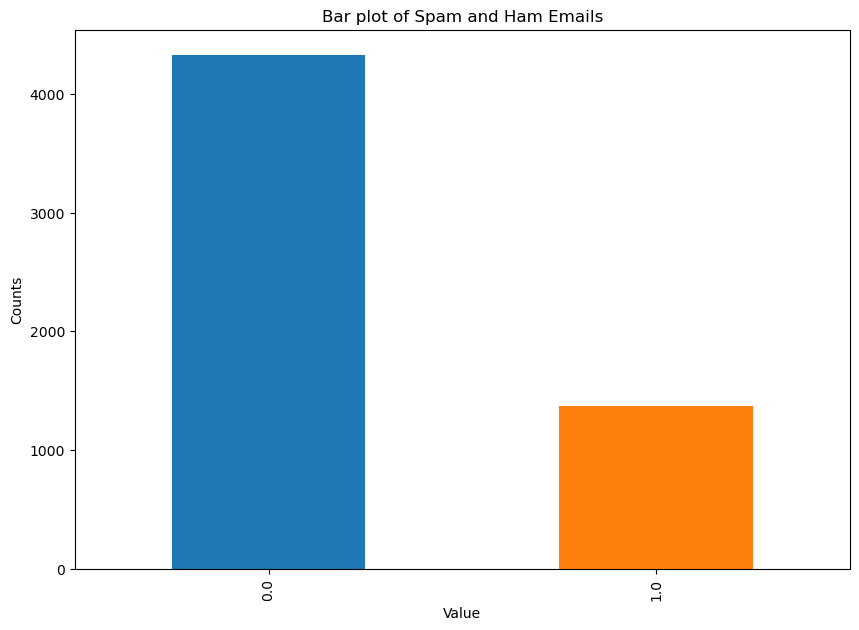

In [70]:
plt.figure(figsize = (10,7))
counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Bar plot of Spam and Ham Emails')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()

In [71]:
x = df_3['text']
y = df_3['spam']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [78]:
X_train_count

<4554x33811 sparse matrix of type '<class 'numpy.int64'>'
	with 561266 stored elements in Compressed Sparse Row format>

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB    

In [84]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Lasso': Lasso(max_iter=10000),  
    'Multinomial Naive Bayes': MultinomialNB(),
    
}


params = {
    'Logistic Regression': [{'penalty': ['l2'], 'C': [0.1]}],  
    'Random Forest Classifier': [{'max_depth': [None], 'n_estimators': [100]}], 
    'Support Vector Machine': [{'C': [10], 'gamma': ['scale']}],  
    'Lasso': [{'alpha': [0.1]}],  
    'Multinomial Naive Bayes': [{'alpha': [0.1]}],  
}


grid_search_params = {'cv': 5, 'verbose': 1}


In [85]:
for name, model in models.items():
    param_grid = params[name]
    grid_search = GridSearchCV(model, param_grid, **grid_search_params)
    
    
    grid_search.fit(X_train_count, y_train)
    
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best score for Logistic Regression: 0.9868242843874018
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Random Forest Classifier: {'max_depth': None, 'n_estimators': 100}
Best score for Random Forest Classifier: 0.9659622923728302
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale'}
Best score for Support Vector Machine: 0.9813333976670968
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Lasso: {'alpha': 0.1}
Best score for Lasso: 0.17429015866650147
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Multinomial Naive Bayes: {'alpha': 0.1}
Best score for Multinomial Naive Bayes: 0.9927540077924272


In [86]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [92]:
clf = Pipeline([
    ('Vectorzier', CountVectorizer()),
    ('nb', MultinomialNB(alpha = 0.1))
])


In [93]:
clf.fit(X_train, y_train)

Pipeline(steps=[('Vectorzier', CountVectorizer()),
                ('nb', MultinomialNB(alpha=0.1))])

In [94]:
y_predicted = clf.predict(X_test)

array([0., 0., 1., ..., 0., 0., 0.])

In [95]:
clf.score(X_test, y_test)

0.990342405618964

In [96]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test)